# Úkol č. 1 - vizualizace dat a web scraping (do 20. října)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.volby.cz týkající se voleb do zastupitelstva Vámi vybraného (většího) města, uložit data o závěrečných pracích v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Výběr zdroje dat

Vyberte si větší město, které má zastupitelstvo druhu 3 (Zastupitelstvo statutárního města) a strojově stáhněte informace o stranách a kandidátkách z následujících let:
 * [2002](https://www.volby.cz/pls/kv2002/kv12?xjazyk=CZ&xid=0), [2006](https://www.volby.cz/pls/kv2006/kv12?xjazyk=CZ&xid=0), [2010](https://www.volby.cz/pls/kv2010/kv12?xjazyk=CZ&xid=0), [2014](https://www.volby.cz/pls/kv2014/kv12?xjazyk=CZ&xid=0) a [2018](https://www.volby.cz/pls/kv2018/kv12?xjazyk=CZ&xid=0).
 

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data pro vybrané město a uložte je všechny do (asi dvou) přehledných tabulek ve formátu _csv_.
  * Data musí obsahovat _alespoň_ toto:
    * Vývoj výsledků (v procentech i počtu hlasů) pro jednotlivé strany v jednotlivých letech.
    * Seznam všech kandidátů všech stran v jednotlivých letech, u kandidáta by mělo být zaznamenáno: jméno, věk v době voleb, navrhující strana, politická příslušnost, volební zisk (procento i počet hlasů), pořadí na kandidátce, pořadí zvolení, jestli získal mandát (tyto informace získáte souhrnně ve _jmenných seznamech_).
  * V druhé části Vašeho Jupyter notebooku pracujte s těmito tabulkami načtenými z _csv_ souboru (aby opravující nemusel spouštět stahování z webu).
  * Tabulky ve formátu _csv_ také odevzdejte.
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Časový vývoj (po rocích voleb) počtu kandidujících stran i lidí a to celkově i po jednotlivých stranách (ve volbách, kterých se daná strana účastnila).
    * Věkovou strukturu kandidátů celkově i za jednotlivé strany a vývoj této struktury během jednotlivých voleb.
    * Časový vývoj volební účasti a volebních výsledků jednotlivých stran.
    * Časový vývoj podílu kandidujících s titulem a bez titulu.

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +2 body) U titulů se pokuste rozlišit i různé stupně vzdělání: bakalářský, magisterský, doktorský a vyšší, vojenská hodnost atp. Zkuste odhadnout i podíl žen na kandidátkách.
  * (až +4 body) Pokuste se u jednotlivých kandidátů zjistit, zda kandidovali ve více volbách. Najděte 10 nejpilnějších kandidátů a vypište jejich volební zisky a za jaké strany kandidovali.
  * (až +2 body) Najděte nějaký balíček, který Vám dovolí do Vašeho notebooku zavést interaktivní prvky, např. si vyberete v select-boxu stranu a Váš notebook zobrazí grafy pouze pro ni atp.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor(y) se staženými daty.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

# Stáhnutí dat - Město Plzeň
## Politické strany
### Načtení dat

In [1]:
import pandas as pd
from IPython.display import display
from pandas import MultiIndex
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
urls = {
    2002: "https://www.volby.cz/pls/kv2002/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=3203&xobec=554791",
    2006: "https://www.volby.cz/pls/kv2006/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=3203&xobec=554791&xstat=0&xvyber=0",
    2010: "https://www.volby.cz/pls/kv2010/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=3203&xobec=554791&xstat=0&xvyber=0",
    2014: "https://www.volby.cz/pls/kv2014/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=3203&xobec=554791&xstat=0&xvyber=0",
    2018: "https://www.volby.cz/pls/kv2018/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=3203&xobec=554791&xstat=0&xvyber=0",
}

dfs = {}
for i in urls.keys():
    dfs[i] = pd.read_html(urls[i], flavor='html5lib', decimal=',', thousands='\xa0')[1]
    if i == 2002:
        dfs[i].drop(columns=[
                "Početkandidátů", "Přepočtenýzákladdle počtukandidátů", "Přepočtené % plat. hlasů", "Početmandátů", 
                "Podíly hlasů", ("Kandidátní listina", "Kandidátní listina"),], inplace=True)
        
    else:
        dfs[i].drop(columns=[
                "Početkandidátů", "Přepočtenýzákladdle počtukandidátů", "Přepočtené %platných hlasů", "Početmandátů", 
                "Podílyhlasů", ("Kandidátní listina", "číslo")], inplace=True)
    dfs[i].columns = ["Název strany", "Počet hlasů abs {year}".format(year=i), "Počet hlasů v % {year}".format(year=i)]

KeyError: "['Početkandidátů' 'Přepočtenýzákladdle počtukandidátů'\n 'Přepočtené % plat. hlasů' 'Početmandátů' 'Podíly hlasů'\n ('Kandidátní listina', 'Kandidátní listina')] not found in axis"

### Spojení dat

In [ ]:
data = dfs[2002]
for df in dfs.values():
    data = data.merge(df,how="outer")
#data.fillna(0, inplace = True)


### Uložení výsledků do csv

In [ ]:
#data.to_csv("partyVotes.csv", encoding="windows-1250")
data.to_csv("partyVotes.csv", encoding="utf-8")

## Jednotlivci
### Načtení dat

In [ ]:
titles = {'plk.', 'dipl.', 'ped.', 'um.', 'PhDr.Ing.Mgr.et', 'M.A.', 'MUDr.', 'LL.M.', 'M.Sc.', 'RSDr.', 'JUDr.', 'prom.',
          'ThMgr.', 'prom.ped.', 'Arch.', 'Akad.', 'doc.', 'PhDr.', 'Mgr.', 'Mgr.etMgr', 'Ph.D.', 'MgA.', 'Prof.', 'Th.D.',
          'prof.', 'MSc.', 'MVDr.', 'Doc.', 'Bc.', 'Dr.', 'et', 'arch.', 'ing.', 'CSc.', 'Ing.', 'MPA', 'RNDr.', 'DrSc.',
          'FICS.', 'MBA', 'dr.h.c.', 'DSc.', 'DiS.', 'PaedDr.', 'King'
}
# Titles were obtained by script underneath, applied to all years all other than 2002, where title is separated
# and than manually cleaned from third names etc.
# for s in tmp["Jmeno"]:
#    t = s.split(" ")
#    for st, i in zip(t, range(len(t))):
#        if i > 1:
#            titles.add(st.replace(",", ""))


In [ ]:
urls = {
    2002: 'https://www.volby.cz/pls/kv2002/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=3203&xobec=554791&xstrana=0',
    2006: 'https://www.volby.cz/pls/kv2006/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=3203&xobec=554791&xstrana=0',
    2010: 'https://www.volby.cz/pls/kv2010/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=3203&xobec=554791&xstrana=0',
    2014: 'https://www.volby.cz/pls/kv2014/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=3203&xobec=554791&xstrana=0',
    2018: 'https://www.volby.cz/pls/kv2018/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=3203&xobec=554791&xstrana=0',
}

dfs = {}

for i in urls.keys():
    dfs[i] = pd.read_html(urls[i], flavor='html5lib', decimal=',', thousands='\xa0')[0]
    if i == 2002:
        dfs[i].drop(columns=("Kandidátnílistina"), inplace=True)
        
    else:
        dfs[i].drop(columns=("Kandidátní listina"), inplace=True)
        dfs[i].columns = [
            "Pořadí", "Jmeno", "Věk 2002", "Navrhující strana", "Politická příslušnost", 
            "Hlasy abs.", "Hlasy v %", "Pořadí zvolení", "Mandát"]
        t = []
        n = []
        for names in dfs[i]["Jmeno"]:
            names_separated = names.split(" ")
            titles_to_join = []
            names_to_join = []
            for name in names_separated:
                if name in titles:
                    titles_to_join.append(name)
                else:
                    names_to_join.append(name)
            t.append(" ".join(titles_to_join))
            n.append(" ".join(names_to_join))
        dfs[i].insert(2, "Titul", t)
        dfs[i]["Jmeno"] = n
    dfs[i].columns = [
        "Pořadí na kandidátce v {year}".format(year=i), "Příjmení, jméno", "Tituly {year}".format(year=i), 
        "Věk {year}".format(year=i), "Navrhující strana", "Politická příslušnost","Hlasy abs. {year}".format(year=i),
        "Hlasy v % {year}".format(year=i), "Pořadí zvolení v {year}".format(year=i), "Mandát v {year}".format(year=i)]
    dfs[i]["Mandát v {year}".format(year=i)].fillna("-", inplace=True)
    dfs[i].fillna("", inplace=True)
    


### Spojení dat

In [ ]:
data = dfs[2002]
for df in dfs.values():
    data = data.merge(df,how="outer")
#data.fillna(0, inplace=True)
#data.head(20)
data

### Uložení výsledků do csv

In [ ]:
data.to_csv("candidateVotes.csv", encoding="utf-8")

# Vizualizace dat
## Načtení dat ze souboru

In [3]:
party_votes = pd.read_csv("partyVotes.csv", encoding="utf-8")
candidate_votes = pd.read_csv("candidateVotes.csv", encoding="utf-8")
party_votes.drop(columns=["Unnamed: 0"], inplace=True)
candidate_votes.drop(columns=["Unnamed: 0"], inplace=True)
years = [2002, 2006, 2010, 2014, 2018]

In [4]:
%matplotlib inline
matplotlib.style.use("ggplot")

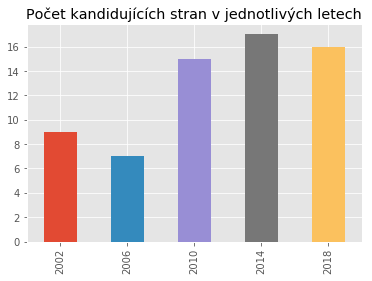

In [5]:
total_attended_parties = party_votes.drop(columns=[
    "Název strany", party_votes.columns[1], party_votes.columns[3], party_votes.columns[5], party_votes.columns[7],
    party_votes.columns[9]
])
total_attended_parties.columns = years
total_attended_parties.count().plot.bar()
plt.title("Počet kandidujících stran v jednotlivých letech")
plt.show()

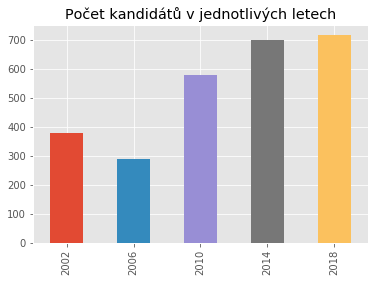

In [6]:
total_attended_candidates = candidate_votes.filter([
    "Pořadí na kandidátce v 2002", "Pořadí na kandidátce v 2006", "Pořadí na kandidátce v 2010",
    "Pořadí na kandidátce v 2014", "Pořadí na kandidátce v 2018"])
total_attended_candidates.columns = years
total_attended_candidates.count().plot.bar()
plt.title("Počet kandidátů v jednotlivých letech")
plt.show()

In [7]:
@interact
def interactive_party_results(party=candidate_votes["Navrhující strana"].unique()):
    total_attended_candidates_by_party = candidate_votes.loc[candidate_votes["Navrhující strana"] == party]
    total_attended_candidates_by_party = total_attended_candidates_by_party.filter([
        "Pořadí na kandidátce v 2002", "Pořadí na kandidátce v 2006", "Pořadí na kandidátce v 2010",
        "Pořadí na kandidátce v 2014", "Pořadí na kandidátce v 2018"])
    total_attended_candidates_by_party.columns = years
    total_attended_candidates_by_party.count().plot.bar()
    plt.title("Počet kandidátů za stranu {} v jednotlivých letech".format(party))
    plt.show()

interactive(children=(Dropdown(description='party', options=('US-DEU', 'ČSSD', 'PVP', 'SZ', 'ODS', 'KSČM', 'KD…

## Věkovou strukturu kandidátů celkově i za jednotlivé strany a vývoj této struktury během jednotlivých voleb.

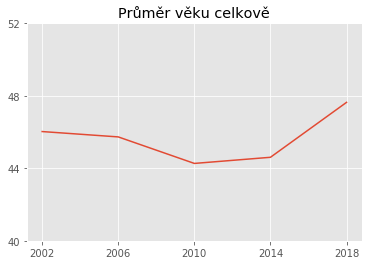

In [8]:
candidates_age = candidate_votes.filter([
    "Věk 2002", "Věk 2006", "Věk 2010", "Věk 2014", "Věk 2018"])
candidates_age.columns = years
candidates_age.mean().plot(xticks=years, yticks=range(40, 55, 4))
plt.title("Průměr věku celkově")
plt.show()

In [9]:
@interact
def interactive_party_results(party=candidate_votes["Navrhující strana"].unique()):
    candidates_age_by_party = candidate_votes.loc[candidate_votes["Navrhující strana"] == party]
    candidates_age_by_party = candidates_age_by_party.filter([
        "Věk 2002", "Věk 2006", "Věk 2010", "Věk 2014", "Věk 2018"])
    candidates_age_by_party.columns = years
    candidates_age_by_party.mean().plot.bar()
    plt.title("Průměr věku ve straně {} v jednotlivých letech".format(party))
    plt.show()

interactive(children=(Dropdown(description='party', options=('US-DEU', 'ČSSD', 'PVP', 'SZ', 'ODS', 'KSČM', 'KD…

## Časový vývoj volební účasti a volebních výsledků jednotlivých stran.

In [10]:
number_of_councilors = 47

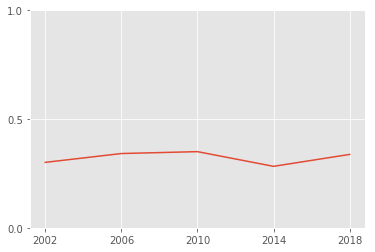

In [11]:

party_votes_absolute = party_votes.filter([
    "Počet hlasů abs 2002", "Počet hlasů abs 2006", "Počet hlasů abs 2010",
    "Počet hlasů abs 2014", "Počet hlasů abs 2018"
])
def get_relative_count(x):
    try:
        res = int(x) / number_of_councilors
        return res
    except:
        return x

def apply_series(x):
    return x.apply(get_relative_count)
party_votes_normalized = party_votes_absolute.apply(apply_series, axis=1)
party_votes_normalized.columns = years

eligible_voters = {
    2002: 138679,
    2006: 137423,
    2010: 134791,
    2014: 133527,
    2018: 130238,
}

def year_eligible_voters():
    year = 2002
    while year < 2019:
        yield eligible_voters[year]
        year += 4

party_votes_normalized.sum().apply(lambda x: x/next(year_eligible_voters())).plot(kind='line', xticks=years, yticks=[.0, .5, 1.])
plt.show()

## Výsledky za stranu

In [12]:
@interact
def interactive_party_results(party=party_votes["Název strany"].to_numpy()):
    votes_per_year_party_abs = party_votes.loc[party_votes["Název strany"] == party]
    votes_per_year_party_abs = votes_per_year_party_abs.filter([
        "Počet hlasů abs 2002", "Počet hlasů abs 2006", "Počet hlasů abs 2010", "Počet hlasů abs 2014", "Počet hlasů abs 2018"])
    votes_per_year_party_abs.columns = years
    votes_per_year_party_abs.iloc[0].plot.bar(title=party, xticks = ([2000,] + years + [2020,]))
    plt.show()
    votes_per_year_party_percent = party_votes.loc[party_votes["Název strany"] == party]
    votes_per_year_party_percent = votes_per_year_party_percent.filter([
        "Počet hlasů v % 2002", "Počet hlasů v % 2006", "Počet hlasů v % 2010", "Počet hlasů v % 2014", "Počet hlasů v % 2018"])
    votes_per_year_party_percent.columns = years
    votes_per_year_party_percent.iloc[0].plot.bar(title=party, xticks = ([2000,] + years + [2020,]))
    plt.show()

AttributeError: 'Series' object has no attribute 'to_numpy'

## Časový vývoj podílu kandidujících s titulem a bez titulu.

In [18]:
@interact
def interactive_degree_ratio(year=years):
    with_title = candidate_votes["Tituly {}".format(year)].count()
    without_title = candidate_votes["Hlasy abs. {}".format(year)].count() - with_title
    print(without_title, with_title)
    degree_ratio = pd.DataFrame(data=[with_title, without_title], index=["Bez titulu", "S titulem"], columns=[year,])
    degree_ratio.plot(title="Podíl kandidátů s titulem", kind='pie', subplots=True)
    plt.show()

interactive(children=(Dropdown(description='year', options=(2002, 2006, 2010, 2014, 2018), value=2002), Output…

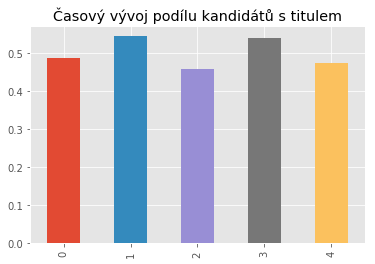

In [14]:
title_share = []
for i in years:
    title_share.append(candidate_votes["Tituly {}".format(i)].count()/candidate_votes["Hlasy abs. {}".format(i)].count())
pd.Series(title_share).plot(title="Časový vývoj podílu kandidátů s titulem", kind='bar', xticks=years)
plt.show()

In [15]:
bachelor={
    'um.', 'Bc.',  
}
magister={
    'dipl.', 'ped.', 'MUDr.', 'LL.M.', 'M.Sc.', 'JUDr.', 'ThMgr.', 'prom.ped.', 'Arch.', 'Mgr.', 'Mgr.etMgr', 'MgA.', 
    'MSc.', 'MVDr.', 'Dr.', 'arch.', 'ing.', 'CSc.', 'Ing.', 'MPA', 'MBA', 
}
higher={
    'PhDr.Ing.Mgr.et', 'RSDr.', 'Akad.', 'doc.', 'PhDr.', 'Ph.D.', 'Prof.', 'Th.D.', 'prof.', 'Doc.', 'RNDr.', 
    'DrSc.', 'dr.h.c.', 'DSc.', 'DiS.', 'PaedDr.', 
}
army={
    'plk.',
}
other={
    'M.A.', 'FICS.', 'King',
}

In [16]:
@interact
def interactive_degree_ratio(year=years):
    candidate_votes_tmp = candidate_votes.fillna("")
    bc, mgr, hg, arm, oth = 0, 0, 0, 0, 0
    for candidate in candidate_votes_tmp.iterrows():
        if candidate[1]["Hlasy abs. {}".format(year)]:
            try:
                for i in higher:
                    if i in candidate[1]["Tituly {}".format(year)]:
                        hg+=1
                for i in magister:
                    if i in candidate[1]["Tituly {}".format(year)]:
                        mgr+=1
                for i in bachelor:
                    if i in candidate[1]["Tituly {}".format(year)]:
                        bc+=1
                for i in army:
                    if i in candidate[1]["Tituly {}".format(year)]:
                        arm+=1
                for i in other:
                    if i in candidate[1]["Tituly {}".format(year)]:
                        oth+=1
            except KeyError as e:
                print(e)
                pass
    #print([bc, mgr, hg, army, other])
    ratio = pd.DataFrame(data=[bc, mgr, hg, arm, oth], columns= [year,], index=["Bachelor", "Master", "Doctor", "Army", "Other"])
    ratio.plot.pie(figsize=(5, 5), subplots=True)
    plt.title("Podíl titulů mezi sebou")
    plt.show()


interactive(children=(Dropdown(description='year', options=(2002, 2006, 2010, 2014, 2018), value=2002), Output…

In [17]:
@interact
def interactive_gender_ratio(year=years):
    male, female = 0, 0
    for candidate in candidate_votes.iterrows():
        if year == 2002:
            if candidate[1]["Hlasy abs. {}".format(year)]>0:
                #print(candidate[1]["Příjmení, jméno"].split("\xa0")[0])
                if candidate[1]["Příjmení, jméno"].split("\xa0")[0].endswith("á"):
                    female+=1
                else:
                    male+=1
        else:
            if candidate[1]["Hlasy abs. {}".format(year)]>0:
                if candidate[1]["Příjmení, jméno"].split(" ")[0].endswith("á"):
                    female+=1
                else:
                    male+=1
    gender_ratio = pd.DataFrame(data=[male, female], columns=[year,], index=["Muž", "Žena"])
    gender_ratio.plot.pie(figsize=(5, 5), subplots=True)
    plt.title("Podíl žen a mužů")
    plt.show()

interactive(children=(Dropdown(description='year', options=(2002, 2006, 2010, 2014, 2018), value=2002), Output…